# **EletroMag - Medidor eletrônico de energia** #

In [139]:
#Bibliotecas
from cmath import pi, sqrt, phase
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

---
Na célula a seguir serão definidas os parâmetros do sistema já conhecidos.:


Informações conhecidas na malha principal

In [140]:
# Voltagem da fonte
Vf = 20
# Impedância da carga
ZC = 1000
# Frequência da fonte
f = 60
# Frequência angular
w=2*pi*f
# Corrente esperada em dominio DC
Iref= Vf/ZC

Bobinas Medições

In [141]:
# Bobina 300 voltas
R300=1.4 #ohms
L300=825e-3 # Henrys

# Bobina de 600 Voltas
R600=2.8 #ohms
L600=3.215 # Henrys

# Bonina de 1200 Voltas
R1200=7.3 #ohms
L1200=8.5 # Henrys

Calculo dos L:

L1 = N1^2*L2/N2^2
L2 = N2^2*L1/N1^2

In [142]:
N1=600
N2=1200

RELACAO_EM_TC = N1**2/N2**2
RELACAO_EM_TT = N2**2/N1**2

print(RELACAO_EM_TC, RELACAO_EM_TT)

0.25 4.0


Informações defenidas no Transformador de corrente

In [143]:
# Resistencia do Transformador de corrente do lado primário
RC1 = R600 # Ohms
# Impedância do Transformador de corrente do lado primário
LC1 = L600 # Henrys
# Resistencia do Transformador de corrente lado secundário
RC2 = R1200 # Ohms
# Impedância do Transformador de corrente lado secundário
LC2 = L1200 # Henrys
# Resistor shunt
RS = 1 # Ohms

# Medias das Impedâncias do transformador de corrente
M1 = sqrt(LC1*LC2)

# Impedância em forma complexa
XM1=1j*w*M1
XC1=1j*w*LC1
XC2=1j*w*LC2

Informações defenidas no Transformador de Tensão

In [144]:
# Resistencia do Transformador de Tensão lado primário
RT1 = R1200
# Impedância do Transformador de Tensão lado primário
LT1 = L1200
# Resistencia do Transformador de Tensão lado secundário
RT2 = R600
# Impedância do Transformador de Tensão lado secundário
LT2 = L600

# Resistor shunt imaginário para poder calcular I2, resistência do ar
R_INF = 1e9 # Ohms

# Medias das Impedâncias do transformador de tensão
M2 = sqrt(LT1*LT2)

# Impedância em forma complexa
XM2=1j*w*M2
XT1=1j*w*LT1
XT2=1j*w*LT2

Funções para calcular as correntes estimadas

In [145]:
def correntes_em_TC() -> tuple[complex, complex]:
    Z=np.array([[RC1+XC1+ZC, -XM1], [-XM1, RC2+XC2+RS]])
    V=np.array([Vf, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[0], I[1]

def correntes_em_TT() -> tuple[complex, complex, complex, complex]:
    Z=np.array([[0, ZC, 0, 0], [-1, 1, 1, 0], [0, -ZC, RT1+XT1, -XM2], [0, 0, -XM2, RT2+LT2+R_INF]])
    V=np.array([Vf, 0, 0, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[0], I[1], I[2], I[3]

---
Definindo as funções que serão utilizadas no projeto:

In [146]:
def v_em_TC(L2: float) -> tuple[complex, complex]:
    L1 = L2*RELACAO_EM_TC

    M = sqrt(L1*L2)

    XM=1j*w*M
    XL1=1j*w*L1
    XL2=1j*w*L2
    
    Z=np.array([[RC1+XL1+ZC, -XM], [-XM, RC2+XL2+RS]])
    V=np.array([Vf, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[1]*RS, L1

def v_em_TT(L1: float) -> tuple[complex, complex]:
    L2 = L1/RELACAO_EM_TT

    M = sqrt(L1*L2)

    XM=1j*w*M

    XL1=1j*w*L1
    XL2=1j*w*L2

    Z=np.array([[-1, 1, 1, 0], [0, ZC, 0, 0], [0, -ZC, RT1+XL1, -XM], [0, 0, -XM, RT2+XL2+R_INF]])
    V=np.array([0, Vf, 0, 0])

    I = np.dot(linalg.inv(Z), V)

    return I[3]*R_INF, L2

In [147]:
ls = np.arange(1e-3, 10, 1e-3)

V2A_list=[]
V2V_list=[]
Ifc_list=[]
Ift_list=[]

for l in ls:
    V2A = v_em_TC(l)[0]
    V2V = v_em_TT(l)[0]

    Ifc = correntes_em_TC()[0]
    Ift = correntes_em_TT()[0]

    V2A_list.append(V2A)
    V2V_list.append(V2V)
    Ifc_list.append(Ifc)
    Ift_list.append(Ift)
    
    print(f'Quando o indutor for de: {l:.3f}H V2A é: {abs(V2A):.3f}V e V2V é: {abs(V2V):.3f}V')

Quando o indutor for de: 0.001H V2A é: 0.000V e V2V é: 0.516V
Quando o indutor for de: 0.002H V2A é: 0.001V e V2V é: 1.027V
Quando o indutor for de: 0.003H V2A é: 0.001V e V2V é: 1.531V
Quando o indutor for de: 0.004H V2A é: 0.002V e V2V é: 2.023V
Quando o indutor for de: 0.005H V2A é: 0.002V e V2V é: 2.500V
Quando o indutor for de: 0.006H V2A é: 0.003V e V2V é: 2.960V
Quando o indutor for de: 0.007H V2A é: 0.003V e V2V é: 3.400V
Quando o indutor for de: 0.008H V2A é: 0.003V e V2V é: 3.818V
Quando o indutor for de: 0.009H V2A é: 0.004V e V2V é: 4.215V
Quando o indutor for de: 0.010H V2A é: 0.004V e V2V é: 4.589V
Quando o indutor for de: 0.011H V2A é: 0.004V e V2V é: 4.939V
Quando o indutor for de: 0.012H V2A é: 0.005V e V2V é: 5.268V
Quando o indutor for de: 0.013H V2A é: 0.005V e V2V é: 5.574V
Quando o indutor for de: 0.014H V2A é: 0.005V e V2V é: 5.859V
Quando o indutor for de: 0.015H V2A é: 0.006V e V2V é: 6.124V
Quando o indutor for de: 0.016H V2A é: 0.006V e V2V é: 6.370V
Quando o

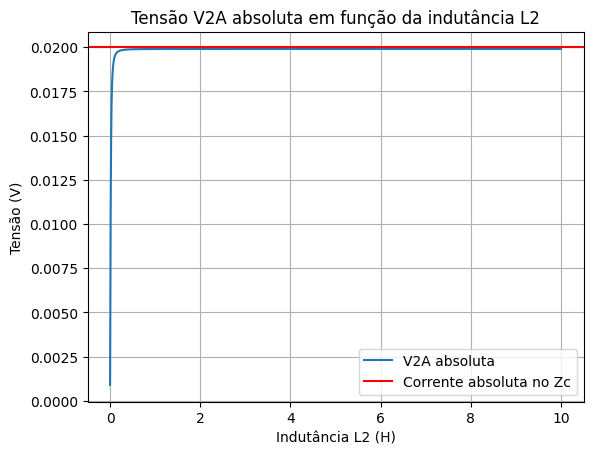

In [148]:
plt.plot(ls, np.absolute(V2A_list)*N2/N1, label='V2A absoluta')
plt.axhline(y=abs(Iref), color='r', linestyle='-', label='Corrente absoluta no Zc')
plt.xlabel('Indutância L2 (H)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2A absoluta em função da indutância L2')
plt.legend()
plt.grid()
plt.show()

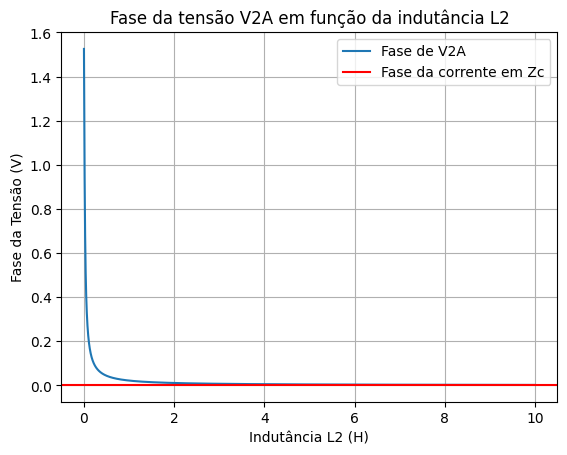

In [149]:
plt.plot(ls, np.angle(V2A_list), label='Fase de V2A')
plt.axhline(y=phase(Iref), color='r', linestyle='-', label='Fase da corrente em Zc')
plt.xlabel('Indutância L2 (H)')
plt.ylabel('Fase da Tensão (V)')
plt.title('Fase da tensão V2A em função da indutância L2')
plt.legend()
plt.grid()
plt.show()

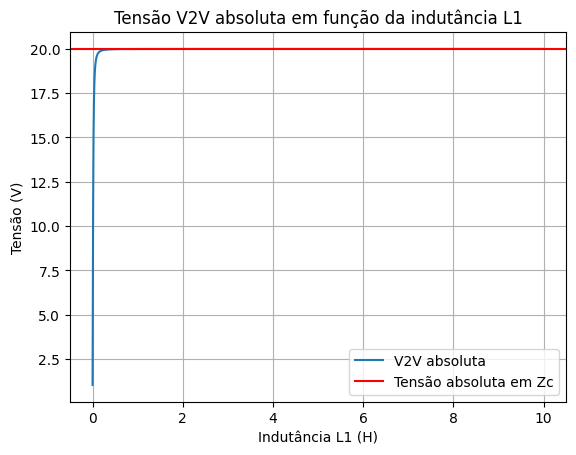

In [150]:
plt.plot(ls, np.absolute(V2V_list)*N2/N1, label='V2V absoluta')
plt.axhline(y=abs(Vf), color='r', linestyle='-', label='Tensão absoluta em Zc')
plt.xlabel('Indutância L1 (H)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2V absoluta em função da indutância L1')
plt.legend()
plt.grid()
plt.show()

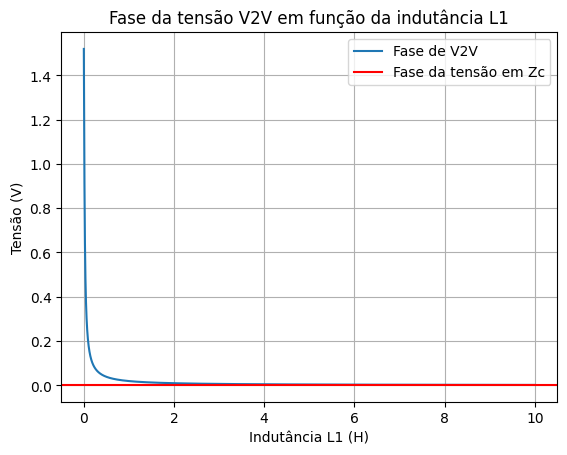

In [151]:
plt.plot(ls, np.angle(V2V_list), label='Fase de V2V')
plt.axhline(y=phase(Vf), color='r', linestyle='-', label='Fase da tensão em Zc')
plt.xlabel('Indutância L1 (H)')
plt.ylabel('Tensão (V)')
plt.title('Fase da tensão V2V em função da indutância L1')
plt.legend()
plt.grid()
plt.show()

In [152]:
Rs = np.arange(1, 1000, 1)

V2A_list_R1=[]
V2V_list_R1=[]
Ifc_list_R1=[]
Ift_list_R1=[]

for r in Rs:
    RC1 = r
    RT1 = r

    V2A_R1 = v_em_TC(LC2)[0]
    V2V_R1 = v_em_TT(LT1)[0]

    Ifc_R1 = correntes_em_TC()[0]
    Ift_R1 = correntes_em_TT()[0]

    V2A_list_R1.append(V2A_R1)
    V2V_list_R1.append(V2V_R1)
    Ifc_list_R1.append(Ifc_R1)
    Ift_list_R1.append(Ift_R1) 
    
    print(f'Quando o resistor for de: {r:.3f} Ohms V2A é: {abs(V2A_R1):.3f}V e V2V é: {abs(V2V_R1):.3f}V')

Quando o resistor for de: 1.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 2.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 3.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 4.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 5.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 6.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 7.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 8.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 9.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 10.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 11.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 12.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 13.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 14.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 15.000 Ohms V2A é

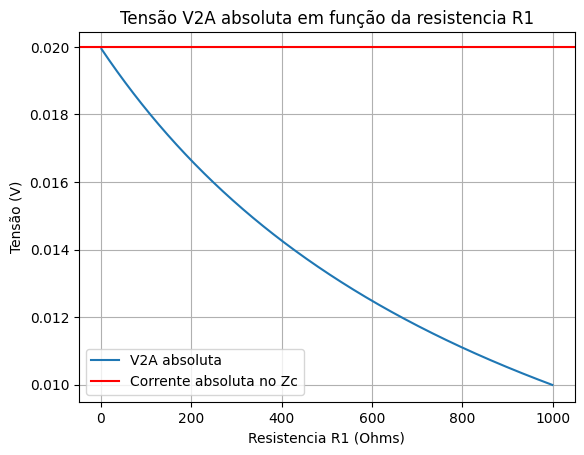

In [153]:
plt.plot(Rs, np.absolute(V2A_list_R1)*N2/N1, label='V2A absoluta')
plt.axhline(y=abs(Iref), color='r', linestyle='-', label='Corrente absoluta no Zc')
plt.xlabel('Resistencia R1 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2A absoluta em função da resistencia R1')
plt.legend()
plt.grid()
plt.show()

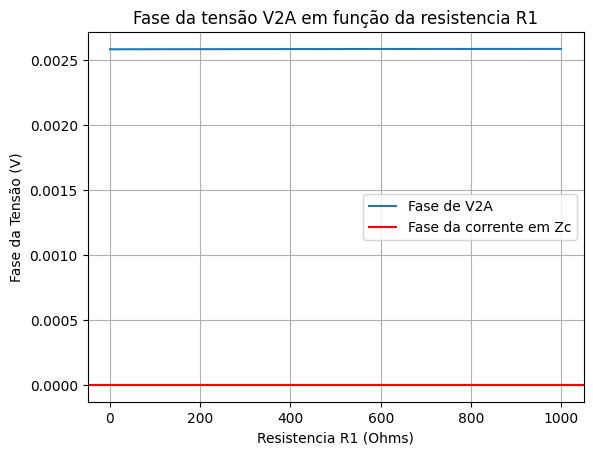

In [154]:
plt.plot(Rs, np.angle(V2A_list_R1), label='Fase de V2A')
plt.axhline(y=phase(Iref), color='r', linestyle='-', label='Fase da corrente em Zc')
plt.xlabel('Resistencia R1 (Ohms)')
plt.ylabel('Fase da Tensão (V)')
plt.title('Fase da tensão V2A em função da resistencia R1')
plt.legend()
plt.grid()
plt.show()

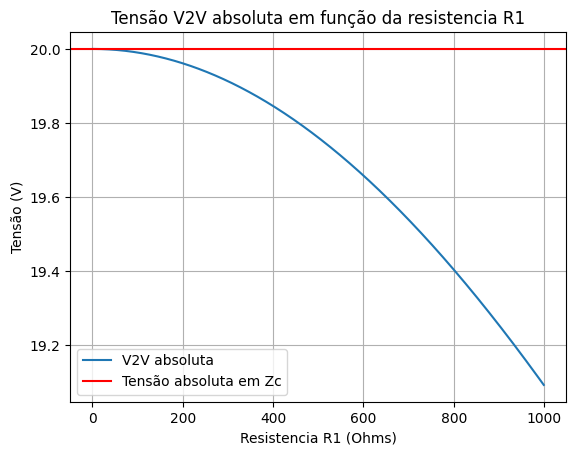

In [155]:
plt.plot(Rs, np.absolute(V2V_list_R1)*N2/N1, label='V2V absoluta')
plt.axhline(y=abs(Vf), color='r', linestyle='-', label='Tensão absoluta em Zc')
plt.xlabel('Resistencia R1 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2V absoluta em função da resistencia R1')
plt.legend()
plt.grid()
plt.show()

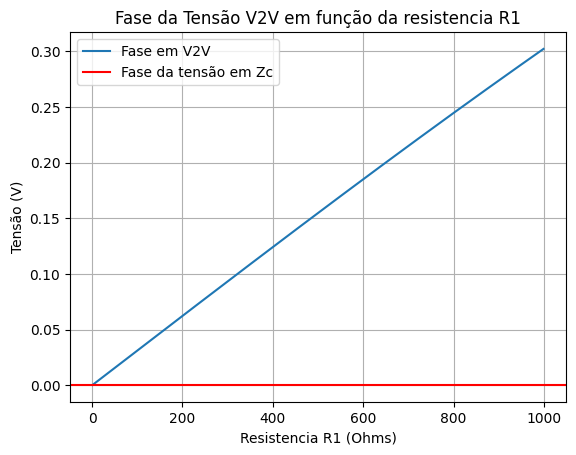

In [156]:
plt.plot(Rs, np.angle(V2V_list_R1), label='Fase em V2V')
plt.axhline(y=phase(Vf), color='r', linestyle='-', label='Fase da tensão em Zc')
plt.xlabel('Resistencia R1 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Fase da Tensão V2V em função da resistencia R1')
plt.legend()
plt.grid()
plt.show()

In [157]:
RC1 = R600
RT1 = R1200

V2A_list_R2=[]
V2V_list_R2=[]
Ifc_list_R2=[]
Ift_list_R2=[]

for r in Rs:
    RC2 = r
    RT2 = r

    V2A_R2 = v_em_TC(LC2)[0]
    V2V_R2 = v_em_TT(LT1)[0]

    Ifc_R2 = correntes_em_TC()[0]
    Ift_R2 = correntes_em_TT()[0]

    V2A_list_R2.append(V2A_R2)
    V2V_list_R2.append(V2V_R2)
    Ifc_list_R2.append(Ifc_R2)
    Ift_list_R2.append(Ift_R2) 
    
    print(f'Quando o resistor for de: {r:.3f} Ohms V2A é: {abs(V2A_R2):.3f}V e V2V é: {abs(V2V_R2):.3f}V')

Quando o resistor for de: 1.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 2.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 3.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 4.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 5.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 6.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 7.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 8.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 9.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 10.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 11.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 12.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 13.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 14.000 Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 15.000 Ohms V2A é

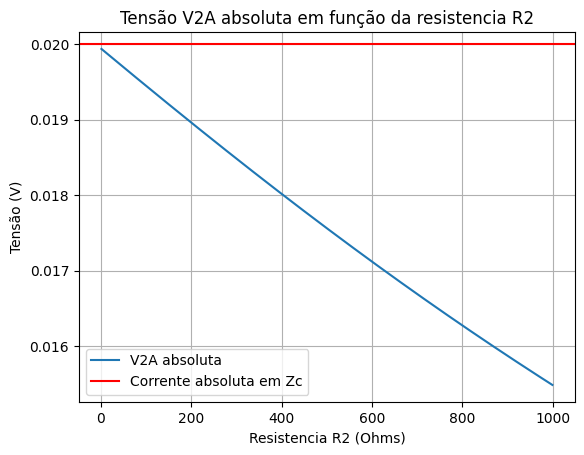

In [158]:
plt.plot(Rs, np.absolute(V2A_list_R2)*N2/N1, label='V2A absoluta')
plt.axhline(y=abs(Iref), color='r', linestyle='-', label='Corrente absoluta em Zc')
plt.xlabel('Resistencia R2 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2A absoluta em função da resistencia R2')
plt.legend()
plt.grid()
plt.show()

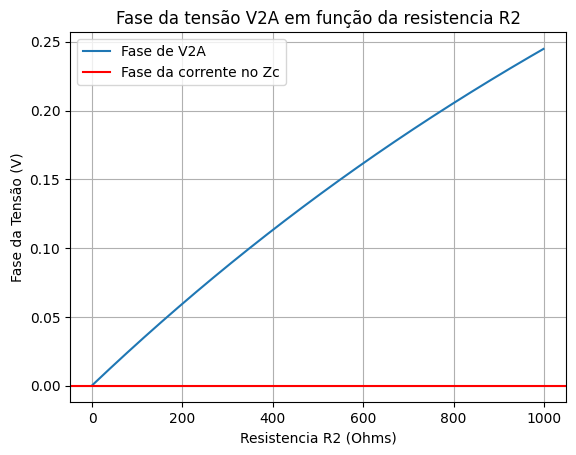

In [159]:
plt.plot(Rs, np.angle(V2A_list_R2), label='Fase de V2A')
plt.axhline(y=phase(Iref), color='r', linestyle='-', label='Fase da corrente no Zc')
plt.xlabel('Resistencia R2 (Ohms)')
plt.ylabel('Fase da Tensão (V)')
plt.title('Fase da tensão V2A em função da resistencia R2')
plt.legend()
plt.grid()
plt.show()

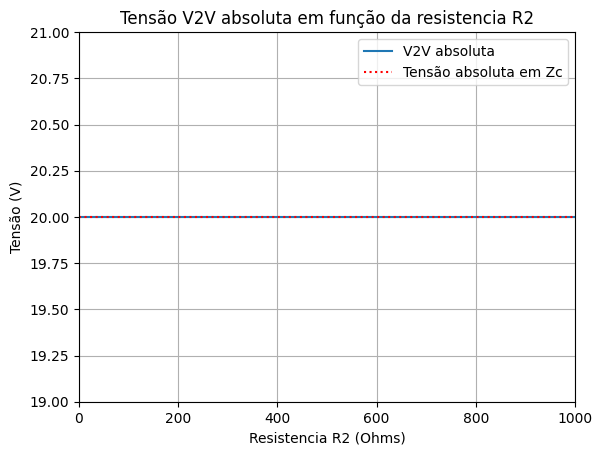

In [160]:
plt.plot(Rs, np.absolute(V2V_list_R2)*N2/N1, label='V2V absoluta')
plt.axhline(y=abs(Vf), color='r', linestyle='dotted', label='Tensão absoluta em Zc')
plt.xlabel('Resistencia R2 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2V absoluta em função da resistencia R2')
plt.legend()
plt.grid()
plt.axis([0, 1000, 19, 21])
plt.show()

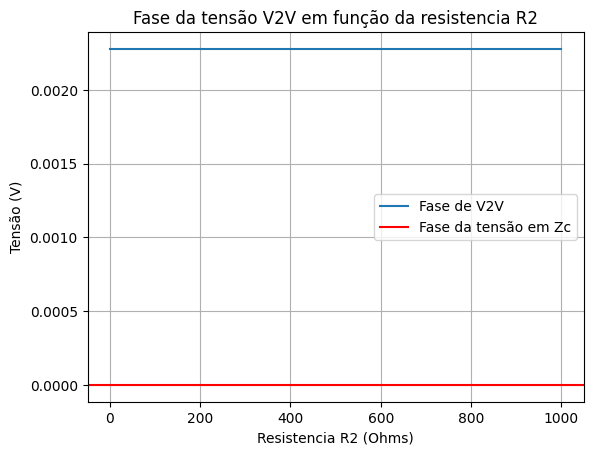

In [161]:
plt.plot(Rs, np.angle(V2V_list_R2), label='Fase de V2V')
plt.axhline(y=phase(Vf), color='r', linestyle='-', label='Fase da tensão em Zc')
plt.xlabel('Resistencia R2 (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Fase da tensão V2V em função da resistencia R2')
plt.legend()
plt.grid()
plt.show()

In [162]:
RC2 = R1200
RT2 = R600

V2A_list_ZC=[]
V2V_list_ZC=[]
Ifc_list_ZC=[]
Ift_list_ZC=[]
Irefs = []

for r in Rs:
    ZC = r
    Iref_ZC = Vf/ZC

    Irefs.append(Iref_ZC)
    V2A_ZC = v_em_TC(LC2)[0]
    V2V_ZC = v_em_TT(LT1)[0]

    Ifc_ZC = correntes_em_TC()[0]
    Ift_ZC = correntes_em_TT()[0]

    V2A_list_ZC.append(V2A_ZC)
    V2V_list_ZC.append(V2V_ZC)
    Ifc_list_ZC.append(Ifc_ZC)
    Ift_list_ZC.append(Ift_ZC) 
    
    print(f'Quando o resistor for de: {r:.3f} Ohms V2A é: {abs(V2A_ZC):.3f}V e V2V é: {abs(V2V_ZC):.3f}V')

Quando o resistor for de: 1.000 Ohms V2A é: 1.702V e V2V é: 10.000V
Quando o resistor for de: 2.000 Ohms V2A é: 1.455V e V2V é: 10.000V
Quando o resistor for de: 3.000 Ohms V2A é: 1.270V e V2V é: 10.000V
Quando o resistor for de: 4.000 Ohms V2A é: 1.127V e V2V é: 10.000V
Quando o resistor for de: 5.000 Ohms V2A é: 1.013V e V2V é: 10.000V
Quando o resistor for de: 6.000 Ohms V2A é: 0.920V e V2V é: 10.000V
Quando o resistor for de: 7.000 Ohms V2A é: 0.842V e V2V é: 10.000V
Quando o resistor for de: 8.000 Ohms V2A é: 0.777V e V2V é: 10.000V
Quando o resistor for de: 9.000 Ohms V2A é: 0.721V e V2V é: 10.000V
Quando o resistor for de: 10.000 Ohms V2A é: 0.672V e V2V é: 10.000V
Quando o resistor for de: 11.000 Ohms V2A é: 0.630V e V2V é: 10.000V
Quando o resistor for de: 12.000 Ohms V2A é: 0.593V e V2V é: 10.000V
Quando o resistor for de: 13.000 Ohms V2A é: 0.559V e V2V é: 10.000V
Quando o resistor for de: 14.000 Ohms V2A é: 0.530V e V2V é: 10.000V
Quando o resistor for de: 15.000 Ohms V2A é

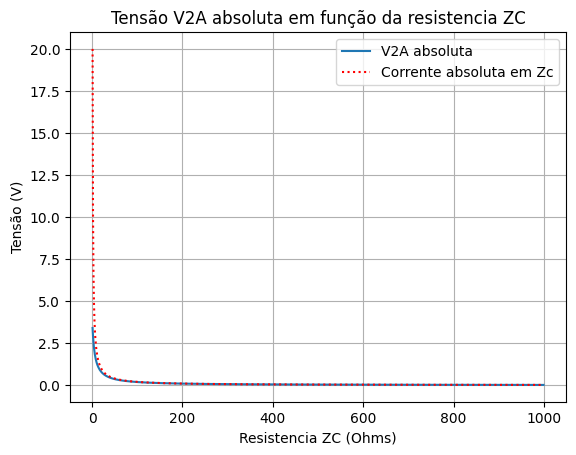

In [163]:
plt.plot(Rs, np.absolute(V2A_list_ZC)*N2/N1, label='V2A absoluta')
plt.plot(Rs, np.absolute(Irefs), color='r', linestyle='dotted', label='Corrente absoluta em Zc')
plt.xlabel('Resistencia ZC (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2A absoluta em função da resistencia ZC')
plt.legend()
plt.grid()
plt.show()

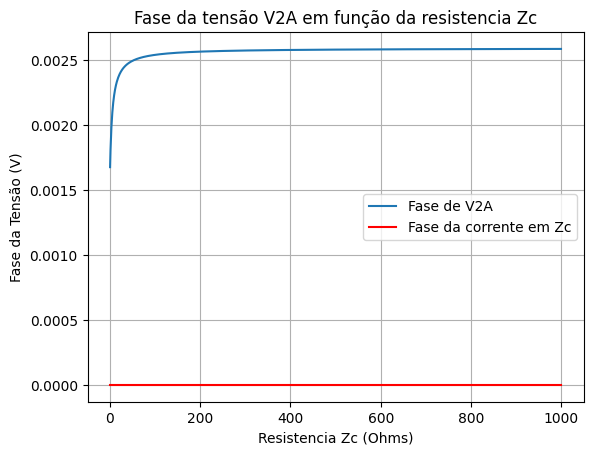

In [164]:
plt.plot(Rs, np.angle(V2A_list_ZC), label='Fase de V2A')
plt.plot(Rs, np.angle(Irefs), color='r', linestyle='-', label='Fase da corrente em Zc')
plt.xlabel('Resistencia Zc (Ohms)')
plt.ylabel('Fase da Tensão (V)')
plt.title('Fase da tensão V2A em função da resistencia Zc')
plt.legend()
plt.grid()
plt.show()

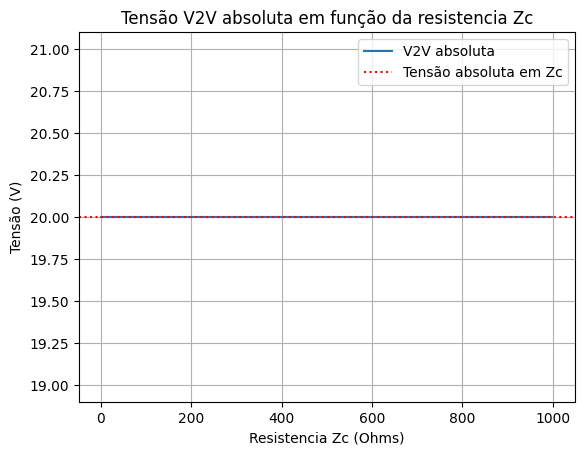

In [165]:
plt.plot(Rs, np.absolute(V2V_list_ZC)*N2/N1, label='V2V absoluta')
plt.axhline(y=abs(Vf), color='r', linestyle='dotted', label='Tensão absoluta em Zc')
plt.xlabel('Resistencia Zc (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2V absoluta em função da resistencia Zc')
plt.legend()
plt.grid()
plt.show()

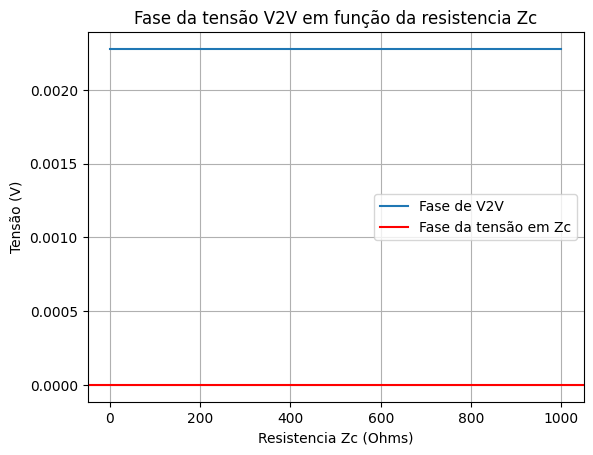

In [166]:
plt.plot(Rs, np.angle(V2V_list_ZC), label='Fase de V2V')
plt.axhline(y=phase(Vf), color='r', linestyle='-', label='Fase da tensão em Zc')
plt.xlabel('Resistencia Zc (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Fase da tensão V2V em função da resistencia Zc')
plt.legend()
plt.grid()
plt.show()

In [167]:
Zs = 1000 + 1j * np.arange(1, 1000, 1)

V2A_list_ZC2=[]
V2V_list_ZC2=[]
Ifc_list_ZC2=[]
Ift_list_ZC2=[]
Irefs2 = []

for z in Zs:
    ZC = z
    Iref_ZC = Vf/ZC

    Irefs2.append(Iref_ZC)
    V2A_ZC2 = v_em_TC(LC2)[0]
    V2V_ZC2 = v_em_TT(LT1)[0]

    Ifc_ZC2 = correntes_em_TC()[0]
    Ift_ZC2 = correntes_em_TT()[0]

    V2A_list_ZC2.append(V2A_ZC2)
    V2V_list_ZC2.append(V2V_ZC2)
    Ifc_list_ZC2.append(Ifc_ZC2)
    Ift_list_ZC2.append(Ift_ZC2) 
    
    print(f'Quando o resistor for de: {z:.3f} Ohms V2A é: {abs(V2A_ZC2):.3f}V e V2V é: {abs(V2V_ZC2):.3f}V')


Quando o resistor for de: 1000.000+1.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+2.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+3.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+4.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+5.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+6.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+7.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+8.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+9.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+10.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+11.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+12.000j Ohms V2A é: 0.010V e V2V é: 10.000V
Quando o resistor for de: 1000.000+13.000j Ohms V2A é: 0.010V

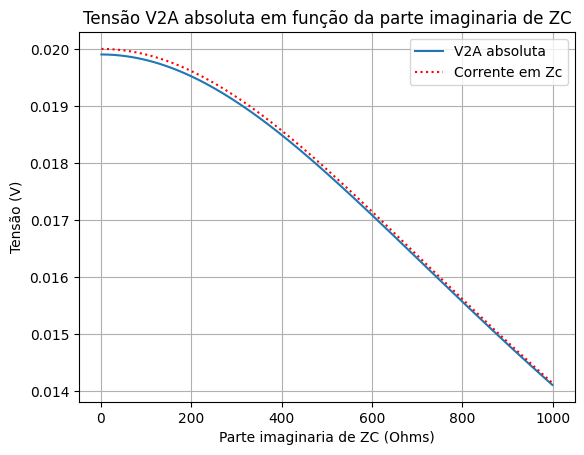

In [168]:
plt.plot(np.imag(Zs), np.absolute(V2A_list_ZC2)*N2/N1, label='V2A absoluta')
plt.plot(np.imag(Zs), np.absolute(Irefs2), color='r', linestyle='dotted', label='Corrente em Zc')
plt.xlabel('Parte imaginaria de ZC (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2A absoluta em função da parte imaginaria de ZC')
plt.legend()
plt.grid()
plt.show()

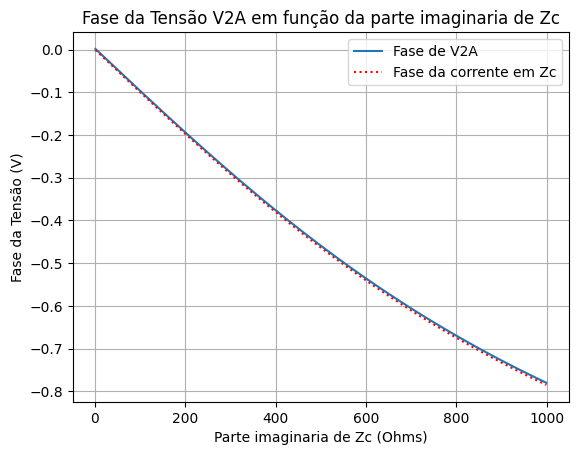

In [169]:
plt.plot(np.imag(Zs), np.angle(V2A_list_ZC2), label='Fase de V2A')
plt.plot(np.imag(Zs), np.angle(Irefs2), color='r', linestyle='dotted', label='Fase da corrente em Zc')
plt.xlabel('Parte imaginaria de Zc (Ohms)')
plt.ylabel('Fase da Tensão (V)')
plt.title('Fase da Tensão V2A em função da parte imaginaria de Zc')
plt.legend()
plt.grid()
plt.show()

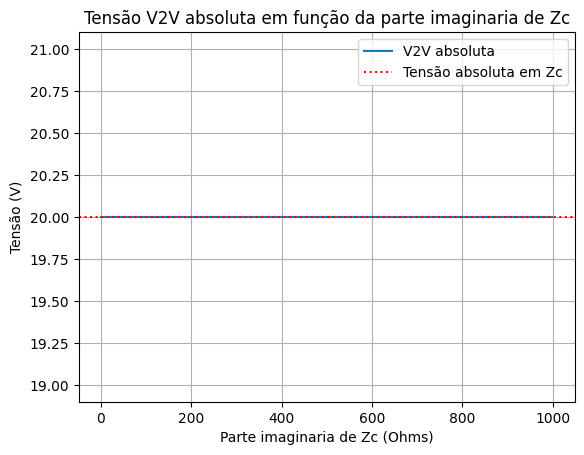

In [170]:
plt.plot(np.imag(Zs), np.absolute(V2V_list_ZC2)*N2/N1, label='V2V absoluta')
plt.axhline(y=abs(Vf), color='r', linestyle='dotted', label='Tensão absoluta em Zc')
plt.xlabel('Parte imaginaria de Zc (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Tensão V2V absoluta em função da parte imaginaria de Zc')
plt.legend()
plt.grid()
plt.show()

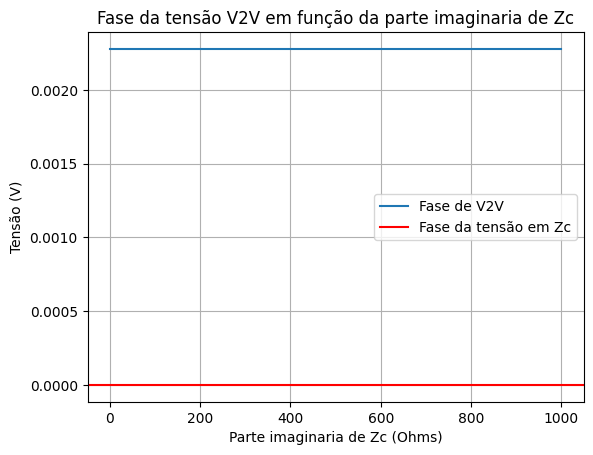

In [171]:
plt.plot(np.imag(Zs), np.angle(V2V_list_ZC2), label='Fase de V2V')
plt.axhline(y=phase(Vf), color='r', linestyle='-', label='Fase da tensão em Zc')
plt.xlabel('Parte imaginaria de Zc (Ohms)')
plt.ylabel('Tensão (V)')
plt.title('Fase da tensão V2V em função da parte imaginaria de Zc')
plt.legend()
plt.grid()
plt.show()